In [1]:
import numpy as np, matplotlib.pyplot as plt
from numpy.linalg import qr

def Vandermonde(x, m):
    '''
    constructs Vandermonde matrix 
    '''
    A = np.ones(len(x))
    for i in range(1, m):
        A = np.c_[A, x**i]
    return A

def bwd_subst(A, b):
    '''
    performs backward substitution for Ax=b and returns x
    assuming A is upper triangular
    '''
    n = b.shape[0]
    sol = np.zeros(n)
    sol[-1] = b[-1]/A[-1, -1]
    for i in range(n-1)[::-1]:
        Sum = np.sum(A[i, i+1:]*sol[i+1:])
        sol[i] = (b[i] - Sum)/A[i, i]
    return sol

def fwd_subst(A, b):
    '''
    performs forward substitution for Ax=b and returns x
    assuming A is lower triangular
    '''
    n = b.shape[0]
    sol = np.zeros(n)
    sol[0] = b[0]/A[0, 0]
    for i in range(n)[1:]:
        Sum = np.sum(A[i, :i]*sol[:i])
        sol[i] = (b[i] - Sum)/A[i, i]
    return sol


def Cholesky(A0):
    '''
    performs a Cholesky decomposition, and returns
    R = sqrt(D)*L, assuming the input matrix is positive definite
    '''
    n = A0.shape[0]
    A = A0
    L = np.zeros((n, n))
    D = np.zeros(n)
    R = np.zeros((n, n))
    for k in range(n):
        L[:, k] = (A[:, k]/A[k, k])
        D[k] = A[k, k]
        R[:, k] = np.sqrt(D[k])*L[:, k]
        l = L[:, k].reshape(n, 1)
        A = A - D[k]*np.matmul(l, l.T)
        
    return R

def QR_solver(x, y, m):
    '''
    fits a polynomial of order m
    on the input data y(x) using QR decomposition
    and backwards substitution
    '''
    VM = Vandermonde(x, m)
    Q, R = qr(VM)

    c = Q.T.dot(y)[:m+1]
    coeffs = bwd_subst(R, c)
    
    return VM.dot(coeffs)

def Cholesky_solver(x, y, m):
    '''
    fits a polynomial of order m
    on the input data y(x) using Cholesky decomposition,
    backwards substitution and 
    forward substitutuion
    '''
    VM = Vandermonde(x, m)
    c = VM.T.dot(y)
    R = Cholesky(np.matmul(VM.T, VM)) 
    #R = np.linalg.cholesky(np.matmul(VM.T, VM))
    w = fwd_subst(R, c)
    v = bwd_subst(R.T, w)

    return VM.dot(v)

In [5]:
n = 30
x = np.linspace(-2, 2, n)
err = np.random.uniform(size=n)
y1 = x*(np.cos(err+0.5*x**3)+np.sin(0.5*x**3))
y2 = 4*x**5 - 5*x**4 - 20*x**3 + 10*x**2 + 40*x + 10 + err

In [ ]:
QR1m3 = QR_solver(x, y1, 3)
QR2m3 = QR_solver(x, y2, 3)

QR1m8 = QR_solver(x, y1, 8)
QR2m8 = QR_solver(x, y2, 8)

C1m3 = Cholesky_solver(x, y1, 3)
C2m3 = Cholesky_solver(x, y2, 3)

C1m8 = Cholesky_solver(x, y1, 8)
C2m8 = Cholesky_solver(x, y2, 8)

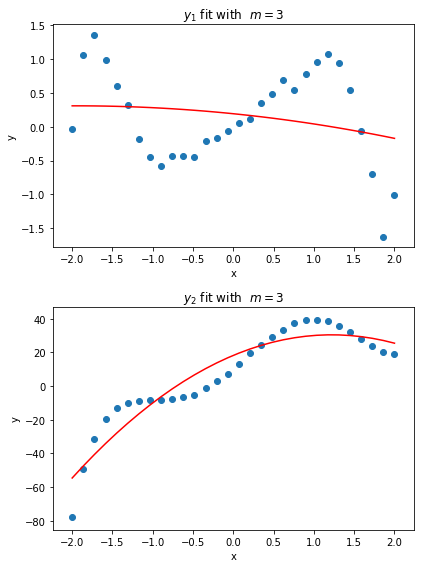

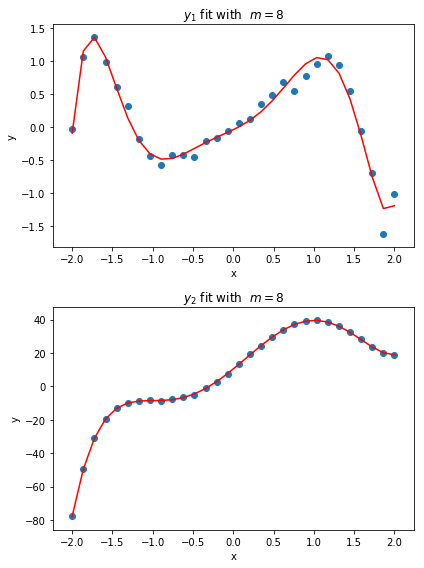

In [3]:
fig = plt.figure(figsize = (6, 8))
fig.add_subplot(211)

plt.plot(x, QR1m3, color='r')
plt.title(r'$y_1$ fit with  $m=3$')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(x, y1)

fig.add_subplot(212)
plt.plot(x, QR2m3, color='r')
plt.scatter(x, y2)
plt.title(r'$y_2$ fit with  $m=3$')
plt.xlabel('x')
plt.ylabel('y')
plt.tight_layout()
#plt.savefig('QRm3.pdf')
plt.show()

fig2 = plt.figure(figsize = (6, 8))
fig2.add_subplot(211)
plt.plot(x, QR1m8, color='r')
plt.scatter(x, y1)
plt.title(r'$y_1$ fit with  $m=8$')
plt.xlabel('x')
plt.ylabel('y')


fig2.add_subplot(212)
plt.plot(x, QR2m8, color='r')
plt.scatter(x, y2)
plt.title(r'$y_2$ fit with  $m=8$')
plt.xlabel('x')
plt.ylabel('y')

plt.tight_layout()
#plt.savefig('QRm8.pdf')
plt.show()



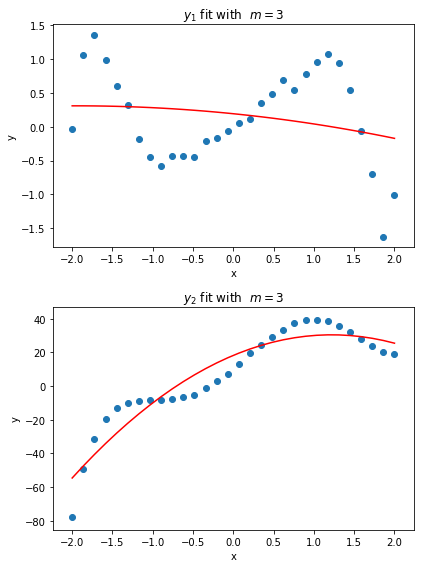

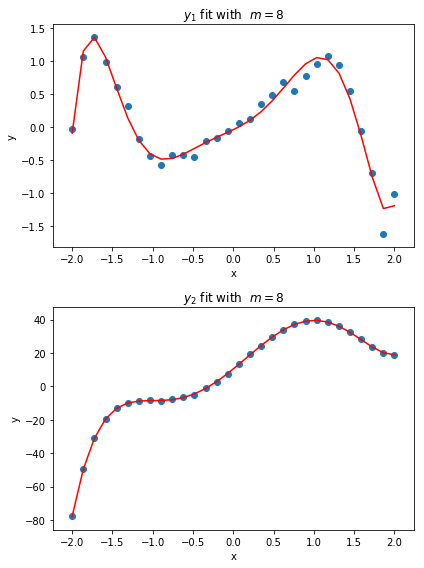

In [4]:
fig = plt.figure(figsize = (6, 8))
fig.add_subplot(211)

plt.plot(x, C1m3, color='r')
plt.title(r'$y_1$ fit with  $m=3$')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(x, y1)

fig.add_subplot(212)
plt.plot(x, C2m3, color='r')
plt.scatter(x, y2)
plt.title(r'$y_2$ fit with  $m=3$')
plt.xlabel('x')
plt.ylabel('y')
plt.tight_layout()
plt.savefig('Cm3.pdf')
plt.show()

fig2 = plt.figure(figsize = (6, 8))
fig2.add_subplot(211)
plt.plot(x, C1m8, color='r')
plt.scatter(x, y1)
plt.title(r'$y_1$ fit with  $m=8$')
plt.xlabel('x')
plt.ylabel('y')


fig2.add_subplot(212)
plt.plot(x, C2m8, color='r')
plt.scatter(x, y2)
plt.title(r'$y_2$ fit with  $m=8$')
plt.xlabel('x')
plt.ylabel('y')

plt.tight_layout()
plt.savefig('Cm8.pdf')
plt.show()

